In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
# 显示图像
def img_show(img):
    if len(img.shape) == 3:
        if img.shape[-1]==3:
            b,g,r = cv2.split(img)
            img = cv2.merge([r,g,b])
        elif img.shape[-1]==4:
            b,g,r,a = cv2.split(img)
            img = img
        plt.imshow(img)
    elif len(img.shape) == 2:
        plt.imshow(img)

In [3]:
# 随机加椒盐函数
def salt(img,n):
    # 循环添加n个椒盐
    for k in range(n):
        # 随机添加椒盐的坐标
        i = int(np.random.random()*img.shape[0])
        j = int(np.random.random()*img.shape[1])
        # 若位灰度图
        img[i,j] = 255
        # 若为RGB图
        img[i,j,0] = 255
        img[i,j,0] = 255
        img[i,j,0] = 255
    return img

In [4]:
# 清洗锐化图片
def cleaning(img):
    bgr = cv2.split(img)
    bgrNew = []
    for c in bgr:
        c = cv2.threshold(c,127,255,cv2.THRESH_BINARY)
        bgrNew.append(c[1])
    img = cv2.merge(bgrNew)
    return img

hand = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/hand.png")
cleaning(hand)
cv2.imwrite("/Users/tanjun/Desktop/tanjun/opencv/hand.png",hand)

True

In [5]:
# 图像处理一般分为空间域处理和频率域处理

# 空间域处理：直接对图像内的像素进行处理。计算简单方便，预算速度快
# 1.灰度变换：对图像内单个像素进行处理，如调节对比度和处理阈值等。
# 2.空间滤波：涉及图像质量的改变，如图像平滑处理。

# 频率域处理：先将图像变换到频率域，然后在频率域对图像进行处理，最后再通过反变换将图像从频率域变换到空间域。
# 傅立叶变换是应用最广泛的一种频率域变换，它能将图像从空间域变换到频率域，而你傅立叶变换能将频率域信息变换到空间域内。

# 14.1 理论基础

In [6]:
# 法国数学家傅立叶指出，任何周期函数都可以表示为不同频率的正弦函数和的形式
# 从时域图形变换到频域图形的过程就是高斯变换
# 频域图：频率、振幅、相位

# 图像处理过程中，傅立叶变换是将图像分解为正弦分量和余弦分量，即图像从空间域转换到频率域。
# 数字图像经傅立叶变换后，得到的频域值是复数，显示傅立叶变换结果要使用实数图像加虚数图像，或者幅度图像加相位图像
# 因为幅度图像包含了原图中我们所要的大部风信息，所以在图像处理中通常仅使用幅度图像
# 当然，如果是想在频域内对图像处理后再通过逆傅立叶变换得到修复后的空间域图像，就必须保留幅度图像和相位图像
# 对图像进行傅立叶变换后，我们会得到低频和高频信息。
# 低频信息对应图像内变化缓慢的灰度分量，高频信息对应图像内变化越来越快的灰度分量，是由灰度的尖锐过度造成的

# 傅立叶变换的目的是为了将图像从空域转到频域，并在频域内对图像实现对图像内特定对象的处理，然后在逆变换到空域图像
# 傅立叶变换可以实现图形增强、图像去噪、边缘检测、特征提取、图像压缩和加密等

# 14.2 Numpy实现傅立叶变换

In [7]:
# Numpy中的fft()函数可以实现图像的傅立叶变换

### 14.2.1 实现傅立叶变换 

In [8]:
# dst = np.fft.fft2(src)
# dst：复数数组（complex ndarray）
# src:：灰度图像

# 经过该函数处理，就得到图像的频谱信息。
# 此时，图像频谱中的零频率分量位于频谱图像的左上角，为了便于观察，通常会用np.fft.fftshift()函数将零频率成分移动到频域图像的中心位置
# dst = np.fft.fftshift(dst)
# 返回值dst：复数数组
# 参数dst：原始频谱

# 图像进行傅立叶变换后得到一个复数数组，为了显示图像，需要将它们的值调整到[0,255]的灰度空间内：
# 新像素值 = 20*np.log(np.abs(频谱值))

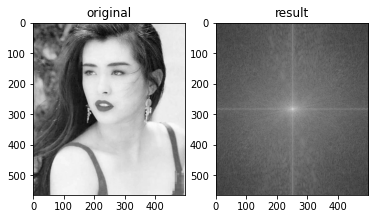

In [15]:
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg",0)

f = np.fft.fft2(wzx)                            # 傅立叶变换
fshift = np.fft.fftshift(f)                     # 移动到中心
magnitude_spectrum = 20*np.log(np.abs(fshift))  # 复数值调整到灰度空间

plt.subplot(121)
plt.imshow(wzx,cmap="gray")
plt.title("original")
plt.axis("off")

plt.subplot(122)
plt.imshow(magnitude_spectrum,cmap="gray")
plt.title("result")
plt.axis("off")

plt.show()

### 14.2.2 实现傅立叶变换

In [16]:
# 需要注意的是，如果在傅立叶变换中使用了np.fft.fftshift()函数移动了零频率分量，则在逆傅立叶变换过程中需首先使用np.fft.ifftshift()
# 函数将零频率分量移动到原来的位置，在进行逆傅立叶变换

# np.fft.ifftshift()是np.fft.fftshift()的逆函数
# np.fft.ifft2()是np.fft.fft2()的逆函数

# np.fft.ifft2()可以实现逆傅立叶变换，返回空域复数数组：
# 返回值 = np.fft.ifft2(频域数据)

# 返回值仍是一个复数数组，需将该信息调整到[0,255]灰度空间内，使用公式：
# iimg = np.abs(逆傅立叶变换结果)

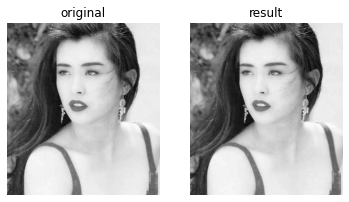

In [20]:
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg",0)

f = np.fft.fft2(wzx)                            # 傅立叶变换
fshift = np.fft.fftshift(f)                     # 零频移动到中心

ishift = np.fft.ifftshift(fshift)               # 零频位置还原
iimg = np.fft.ifft2(ishift)                     # 逆傅立叶变换
iimg = np.abs(iimg)                             # 调整到灰度空间

plt.subplot(121)
plt.imshow(wzx,cmap="gray")
plt.title("original")
plt.axis("off")

plt.subplot(122)
plt.imshow(iimg,cmap="gray")
plt.title("result")
plt.axis("off")

plt.show()

### 14.2.3 高通滤波示例

In [22]:
# 一幅图像中同时存在高频信号和低频信号
# -低频信号：对应图像内变化缓慢的分量
# -高频信号：对应图像内变化越来越快的分量，是由灰度尖锐过度造成的

# 滤波器能允许一定频率的分量通过或者拒绝其通过，按照其作用方式可以分为低通滤波器（允许低频信号通过）和高通滤波器（允许高频信号通过）
# -低通滤波器：使高频信号衰减，对低频信号放行，会使图像模糊
# -高通滤波器：使低频信号衰减，对高频信号放行，会增强图像尖锐细节，会导致图像对比度降低

# 如对傅立叶变换后的图像，使中间低频分量区域都替换为0，就实现了屏蔽低频信号，只保留高频信号，实现高频滤波
# 要将图像中的像素值置0，需先算出中心位置坐标，然后以该点为中心，上下左右各扩30像素，将该区域内像素值置0:
# rows,cols = img.shape
# crow,ccol = int(rows/2),int(cols/2)
# fshift[crow-30:crow+30,ccol-30:ccol+30] = 0

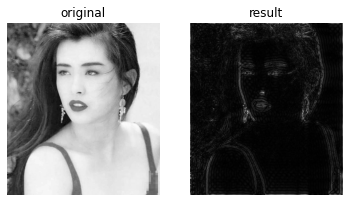

In [26]:
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg",0)

# 图像中心点
rows,cols = wzx.shape
crow,ccol = int(rows/2),int(cols/2)

# 傅立叶变换
f = np.fft.fft2(wzx)
fshift = np.fft.fftshift(f)

# 低通滤波
fshift[crow-30:crow+30,ccol-30:ccol+30] = 0

# 逆傅立叶变换
ishift = np.fft.ifftshift(fshift)
iimg = np.fft.ifft2(ishift)
iimg = np.abs(iimg)

# 显示效果
plt.subplot(121)
plt.imshow(wzx,cmap="gray")
plt.title("original")
plt.axis("off")

plt.subplot(122)
plt.imshow(iimg,cmap="gray")
plt.title("result")
plt.axis("off")

plt.show()

# 14.3 opencv实现傅立叶变换

### 14.3.1 实现傅立叶变换

In [28]:
# opencv提供了函数cv2.dft()和cv2.idft()来实现傅立叶变换和逆傅立叶变换

# 返回结果 = cv2.dft(原始图像，转换标识)
# 原始图像：要首先使用np.float32()函数将图像转成np.float32格式
# 转换标识：通常为cv2.DFT_COMPLEX_OUTPUT，用来输出一个复数阵列

# 函数cv2.dft()返回的结果与Numpy傅立叶变换返回的结果一致，但它返回的结果是双通道的，第1个通道是实数部分，第2各通道是虚数部分
# 经过cv2.dft()变换后，得到原始图像的频谱信息，此时零频率分量并不在中心位置，可使用np.fft.fftshift()将其移动至中心位置

# 函数cv2.magnitude()可以计算频谱信息的幅度：
# 返回值 = cv2.magnitude(参数1，参数2)
# 参数1：浮点型x轴坐标，也就是实部
# 参数2：浮点型y轴坐标，也就是虚部，它必须和参数1具有相同大小（size值的大小，不是value值的大小）
# 返回值：是参数1和参数2的平方和的平方根：
# dst(I) = √(x(I)^2+y(I)^2)
# I：原始图像
# dst：目标图像

# 得到频谱信息后，需要将幅度的值映射到灰度图像[0,255]范围内，使图像显示出来：
# result = 20*np.log(cv2.magnitude(实部，虚部))

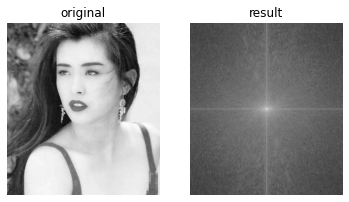

In [32]:
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg",0)

# 傅立叶变换
wzxf32 = np.float32(wzx)                               # 转图片类型为np.float32
dft = cv2.dft(wzxf32,flags=cv2.DFT_COMPLEX_OUTPUT)     # 傅立叶变换
dftShift = np.fft.fftshift(dft)                        # 零频移动到中心
mgnt = cv2.magnitude(dftShift[:,:,0],dftShift[:,:,1])  # 计算频谱信息振幅
result = 20*np.log(mgnt)                               # 映射到灰度图范围

# 显示
plt.subplot(121)
plt.imshow(wzx,cmap="gray")
plt.title("original")
plt.axis("off")

plt.subplot(122)
plt.imshow(result,cmap="gray")
plt.title("result")
plt.axis("off")

plt.show()

### 14.3.2 实现逆傅立叶变换 

In [33]:
# 返回结果 = cv2.idft(原始数据)

# 使用np.ttf.ittfshift()移动还原零频率分量位置
# 逆傅立叶变换，结果仍是复数
# 将逆傅立叶变换结果使用函数cv2.magnitude()计算幅度

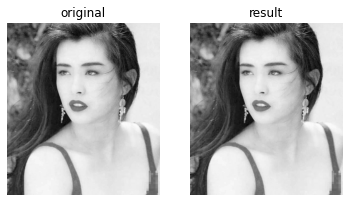

In [40]:
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg",0)

# 傅立叶变换
dft = cv2.dft(np.float32(wzx),flags=cv2.DFT_COMPLEX_OUTPUT)
dftshift = np.fft.fftshift(dft)

# 逆傅立叶变换
ishift = np.fft.ifftshift(dftshift)
iimg = cv2.idft(ishift)
iimg = cv2.magnitude(iimg[:,:,0],iimg[:,:,1])

# 显示
plt.subplot(121)
plt.imshow(wzx,cmap="gray")
plt.title("original")
plt.axis("off")

plt.subplot(122)
plt.imshow(iimg,cmap="gray")
plt.title("result")
plt.axis("off")

plt.show()

# 14.3.3 低通滤波示例

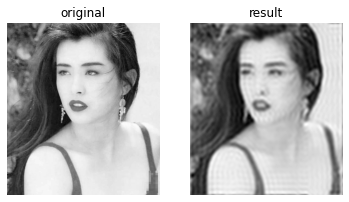

In [43]:
# 将傅立叶变换结果中的高频信号置0后，就是实现了低通滤波
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg",0)

# 中心点
rows,cols = wzx.shape
crow,ccol = int(rows/2),int(cols/2)

# 傅立叶变换
dft = cv2.dft(np.float32(wzx),flags=cv2.DFT_COMPLEX_OUTPUT)
dftshift = np.fft.fftshift(dft)

# 低通滤波
mask = np.zeros([rows,cols,2],np.uint8)  # 两个通道，与频率图像匹配
mask[crow-30:crow+30,ccol-30:ccol+30] = 1
fshift = dftshift*mask

# 逆傅立叶变换
ifshift = np.fft.ifftshift(fshift)
idft = cv2.idft(ifshift)
mgnt = cv2.magnitude(idft[:,:,0],idft[:,:,1])

# 显示
plt.subplot(121)
plt.imshow(wzx,cmap="gray")
plt.title("original")
plt.axis("off")

plt.subplot(122)
plt.imshow(mgnt,cmap="gray")
plt.title("result")
plt.axis("off")

plt.show()